In [28]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
df.columns

Index(['tconst', 'primaryTitle', 'originalTitle', 'year', 'runtimeMinutes',
       'genres', 'rating', 'votes', 'country'],
      dtype='object')

In [19]:
# read ./data/movies.parquet
df = pd.read_parquet('../data/movies.parquet')

In [20]:
# Print 15 most popular genres
print(df['genres'].value_counts().head(55))

genres
Drama                            131785
Documentary                      108510
Comedy                            49370
Horror                            19467
Thriller                          16620
Action                            16325
Comedy,Drama                      14333
Drama,Romance                     13842
Romance                            8237
Comedy,Romance                     7811
Adult                              6407
Crime,Drama                        6197
Comedy,Drama,Romance               5845
Crime                              5464
Drama,Thriller                     5091
Adventure                          4806
Sci-Fi                             4727
Action,Drama                       4516
Action,Crime,Drama                 4307
Family                             4244
Western                            4207
Horror,Thriller                    4172
Documentary,Music                  3759
Animation                          3630
Biography,Documentary            

In [36]:
# Step 1: Create a new DataFrame where each movie-genre pair is a row
df_genres = df[['primaryTitle', 'genres', 'year']].copy()
df_genres = df_genres.dropna(subset=['genres'])  # Remove rows with missing genres

# Step 2: Split the genres
df_genres['genres'] = df_genres['genres'].str.split(',')

# Step 3: Explode into one row per genre
df_genres = df_genres.explode('genres')

# Filter out rows with missing values in 'year'
df_genres = df_genres.dropna(subset=['year'])
df_genres['year'] = df_genres['year'].astype(int)

# Step 4: Filter year range
df_genres = df_genres[df_genres['year'].between(1920, 2022)]

In [37]:
# Count movies per genre per year
genre_year = df_genres.groupby(['year', 'genres']).size().reset_index(name='count')

# Pivot to wide format: one column per genre
pivot = genre_year.pivot(index='year', columns='genres', values='count').fillna(0)

# Normalize to get percentages
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0)

df_genres

,primaryTitle,genres,year
460,Dodge City Trail,Drama,1936
460,Dodge City Trail,Music,1936
460,Dodge City Trail,Western,1936
924,Charley's Aunt,Comedy,1925
1346,The Prince of Pep,Drama,1925
...,...,...,...
714010,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary,2015
714011,De la ilusión al desconcierto: cine colombiano...,Documentary,2007
714012,Dankyavar Danka,Comedy,2013
714013,6 Gunn,Drama,2017


In [43]:
# Get total count per genre and select top 8
top_genres = pivot.sum().sort_values(ascending=False).head(15).index

# Filter only these genres and recompute "Other" to keep 100%
pivot_percent_top = pivot_percent[top_genres]
pivot_percent_top['Other'] = 1 - pivot_percent_top.sum(axis=1)


/var/folders/sv/_w7_lr4s79bd9y8fpvjxy5d80000gn/T/ipykernel_2015/2119758459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_percent_top['Other'] = 1 - pivot_percent_top.sum(axis=1)


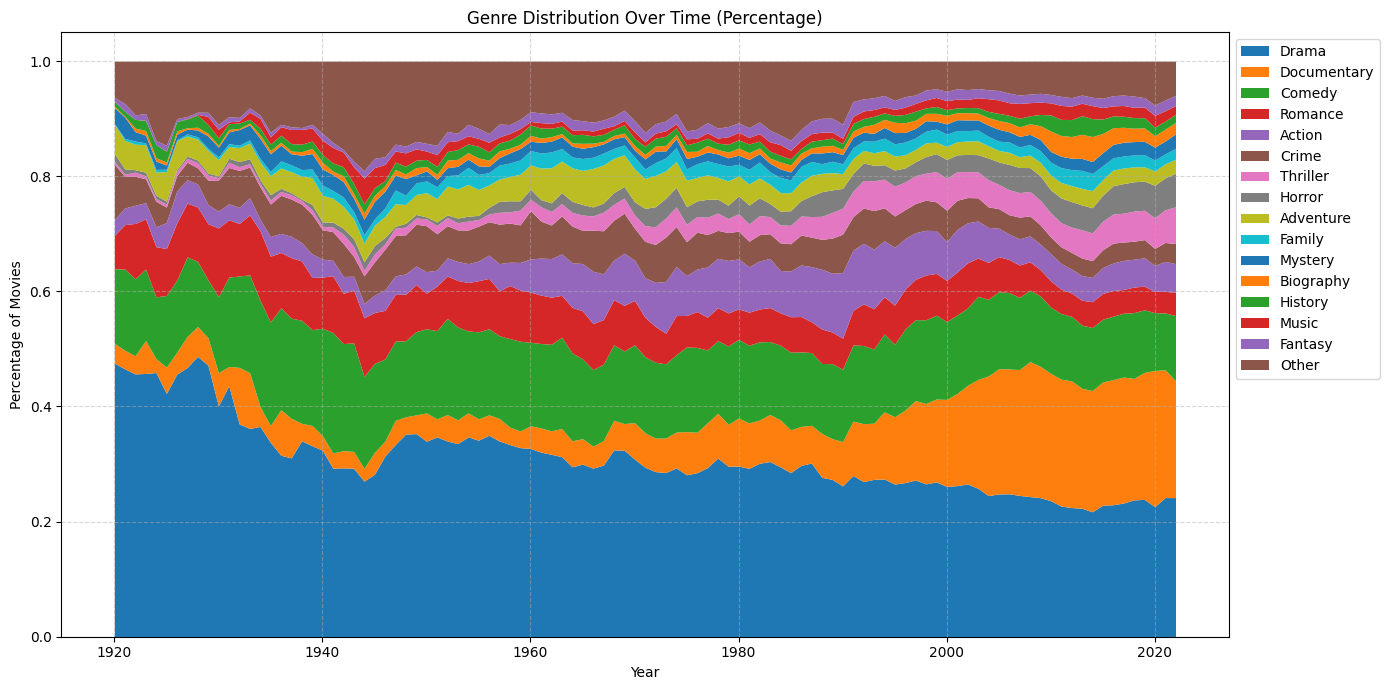

In [44]:
pivot_percent_top.plot.area(figsize=(14, 7), linewidth=0)
plt.title("Genre Distribution Over Time (Percentage)")
plt.ylabel("Percentage of Movies")
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Count number of movies per genre
genre_counts = df_genres['genres'].value_counts()

# Count per genre per year
genre_year_counts = df_genres.groupby(['year', 'genres']).size().reset_index(name='count')

# Example: Normalize per year
total_per_year = df_genres.groupby('year').size().reset_index(name='total')
genre_year_counts = genre_year_counts.merge(total_per_year, on='year')
genre_year_counts['percentage'] = genre_year_counts['count'] / genre_year_counts['total']


NameError: name 'df_exploded' is not defined